# 1.1 Imports

In [1]:
#Import all packages that will be used during this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 2.1 Load Asteroid Data

In [2]:
#Read File and verify that it loaded properly.
file = 'Asteroid_Updated.csv'
df = pd.read_csv(file, sep=',')

C:\Users\eboci_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Verify that the data loaded correctly.
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


# 3.1 Data Exploration and Inital Cleaning

### 3.2 Columns

In [4]:
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

The columns need to be renamed to better communicate what they represent.

In [5]:
new_columns_dict = {'name':'obj_name','a':'semi-major_axis(au)','e':'eccentricity',
                    'i':'x-y_inclination(deg)','om':'longitude_asc_node','w':'argument_perihelion',
                    'q':'perihelion_dist(au)','ad':'aphelion_dist(au)', 'per_y':'orbital_period',
                   'data_arc':'data_arc(d)','condition_code':'condition_code','n_obs_used':'n_obs_used',
                   'H':'abs_mag_para', 'neo':'near_earth_obj', 'pha':'physically_hazardous_asteroid',
                   'diameter':'diameter','extent':'axial_ellipsoid_dim(Km)','albedo':'geo_albedo',
                   'rot_per':'rot_per(h)','GM':'std_gravitational_para','BV':'bv_color_mag_diff',
                   'UB':'ub_color_mag_diff','IR':'ir_color_mag_diff','spec_B':'SMASSII_spec_tax_type',
                   'spec_T':'Tholen_spec_tax_type','G':'mag_slope_para','moid':'earth_min_oribit_inter_dist(au)',
                   'class':'class','n':'mean_motion(deg/d)','per':'orbital_period(d)','ma':'mean_anomaly(deg)'}

df = df.rename(columns = new_columns_dict)
df.columns

Index(['obj_name', 'semi-major_axis(au)', 'eccentricity',
       'x-y_inclination(deg)', 'longitude_asc_node', 'argument_perihelion',
       'perihelion_dist(au)', 'aphelion_dist(au)', 'orbital_period',
       'data_arc(d)', 'condition_code', 'n_obs_used', 'abs_mag_para',
       'near_earth_obj', 'physically_hazardous_asteroid', 'diameter',
       'axial_ellipsoid_dim(Km)', 'geo_albedo', 'rot_per(h)',
       'std_gravitational_para', 'bv_color_mag_diff', 'ub_color_mag_diff',
       'ir_color_mag_diff', 'SMASSII_spec_tax_type', 'Tholen_spec_tax_type',
       'mag_slope_para', 'earth_min_oribit_inter_dist(au)', 'class',
       'mean_motion(deg/d)', 'orbital_period(d)', 'mean_anomaly(deg)'],
      dtype='object')

### 3.3 Missing Values

#### 3.3.1 Initial Percentages

In [6]:
#Missing values percentages.
missing= pd.concat([pd.isnull(df).sum(), 100 * pd.isnull(df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
eccentricity,0,0.000000
x-y_inclination(deg),0,0.000000
longitude_asc_node,0,0.000000
argument_perihelion,0,0.000000
perihelion_dist(au),0,0.000000
class,0,0.000000
n_obs_used,0,0.000000
orbital_period,1,0.000119
semi-major_axis(au),2,0.000238
mean_motion(deg/d),2,0.000238


In [7]:
#The target feature has a significant number of missing values.
#If those rows are removed, is there still enough information to work with?

total_rows = len(df.index)
total_rows

839714

In [8]:
#Calculate the number of non-null diameters.
valid_rows = df['diameter'].notnull().sum()
valid_rows

137636

Even if all rows with missing diameters are removed, there are a significant number of records to work with.

In [9]:
#Remove rows with missing diameter.
df = df.dropna(axis=0, subset=['diameter'])

#Check that matches valid_rows.
len(df.index)

137636

#### 3.3.2 New Percentages of Missing Values

In [10]:
#Recheck percentage of missing values for any columns that need to be removed.
missing= pd.concat([pd.isnull(df).sum(), 100 * pd.isnull(df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
diameter,0,0.000000
mean_motion(deg/d),0,0.000000
class,0,0.000000
earth_min_oribit_inter_dist(au),0,0.000000
orbital_period(d),0,0.000000
physically_hazardous_asteroid,0,0.000000
near_earth_obj,0,0.000000
n_obs_used,0,0.000000
condition_code,0,0.000000
mean_anomaly(deg),0,0.000000


Even after removing the missing diamter rows, there are still columns with more than half their values missing. These columns should be removed.

In [11]:
#List of columns to drop.
drop_list = ['abs_mag_para','geo_albedo','obj_name','rot_per(h)','SMASSII_spec_tax_type',
             'bv_color_mag_diff','Tholen_spec_tax_type','ub_color_mag_diff','mag_slope_para',
             'axial_ellipsoid_dim(Km)','std_gravitational_para','ir_color_mag_diff']
df.drop(drop_list, axis=1, inplace=True)

#There were originally 31 columns, test that there are only 19.
len(df.columns)

19

### 3.4 Data Types

In [12]:
df.dtypes

semi-major_axis(au)                float64
eccentricity                       float64
x-y_inclination(deg)               float64
longitude_asc_node                 float64
argument_perihelion                float64
perihelion_dist(au)                float64
aphelion_dist(au)                  float64
orbital_period                     float64
data_arc(d)                        float64
condition_code                      object
n_obs_used                           int64
near_earth_obj                      object
physically_hazardous_asteroid       object
diameter                            object
earth_min_oribit_inter_dist(au)    float64
class                               object
mean_motion(deg/d)                 float64
orbital_period(d)                  float64
mean_anomaly(deg)                  float64
dtype: object

#### 3.4.1 Object Features

In [13]:
df.select_dtypes('object').tail()

,condition_code,near_earth_obj,physically_hazardous_asteroid,diameter,class
797860,1,N,N,3.793,MBA
798077,2,N,N,2.696,MBA
798189,1,N,N,2.917,MBA
799752,2,N,N,3.271,MBA
810375,3,N,N,1.6,MBA


Diameter, at this stage, should be numerical.

In [14]:
#df['diameter'] = pd.to_numeric(df['diameter'])
#Running this initially failed at position 15, so find out why.

In [15]:
df['diameter'].iloc[15]

'226\u2009'

In [16]:
df.at[15,'diameter']=226

In [17]:
df['diameter'].iloc[15]

226

In [18]:
#Now that the value is adjusted, try changinging to numeric again.
df['diameter'] = pd.to_numeric(df['diameter'])

Explore the unique values of the object features.

In [19]:
df.condition_code.unique()

array([0, 1, 3, 2, '0', '1', '2', '3', '4', '5', '9', '7', 5.0, 6.0, 4.0,
       7.0, 9.0, 8.0, '8', '6'], dtype=object)

In [20]:
df.near_earth_obj.unique()

array(['N', 'Y'], dtype=object)

In [21]:
df.physically_hazardous_asteroid.unique()

array(['N', 'Y'], dtype=object)

In [22]:
df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO'], dtype=object)

The condition code is inconsistent. It appears that it should have 10 values of the same type, but there are integers, floats, and strings. Converting it to integer type, creates consistency.

In [23]:
df['condition_code']=df['condition_code'].astype('int64')
df.condition_code.unique()

array([0, 1, 3, 2, 4, 5, 9, 7, 6, 8], dtype=int64)

Look at how the objects are distributed. If there are only few of a type, the feature may not be important.

In [24]:
df['near_earth_obj'].value_counts()

N    136786
Y       850
Name: near_earth_obj, dtype: int64

In [25]:
df['physically_hazardous_asteroid'].value_counts()

N    137415
Y       221
Name: physically_hazardous_asteroid, dtype: int64

In [26]:
df['class'].value_counts()

MBA    126390
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

There is enough variation to keep the features for now.

#### 3.4.2 Integer Features

In [27]:
df.select_dtypes('int64')

,condition_code,n_obs_used
0,0,1002
1,0,8490
2,0,7104
3,0,9325
4,0,2916
...,...,...
797860,1,50
798077,2,33
798189,1,47
799752,2,27


This is the number of observations used, so integer makes sense for this feature.

#### 3.4.3 Float Features

In [28]:
df.select_dtypes('float64')

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),orbital_period,data_arc(d),diameter,earth_min_oribit_inter_dist(au),mean_motion(deg/d),orbital_period(d),mean_anomaly(deg)
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,939.400,1.59478,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,545.000,1.23324,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,246.596,1.03454,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,525.400,1.13948,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,106.699,1.09589,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797860,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,3.793,1.66301,0.174527,2062.713583,164.999439
798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,2.696,1.36733,0.242270,1485.943371,145.319581
798189,3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,3.840180,5.580811,2839.0,2.917,1.43837,0.176610,2038.391053,174.609920
799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,3.271,1.16684,0.184914,1946.853973,175.708508


There does not appear to be any issues with types for these columns. Explore it further.

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
semi-major_axis(au),137636.0,2.814613,1.522740,0.626226,2.536714,2.750859,3.092537,3.891460e+02
eccentricity,137636.0,0.145485,0.077573,0.000489,0.089623,0.138543,0.191141,9.843482e-01
x-y_inclination(deg),137636.0,10.349182,6.835111,0.021855,5.120506,9.389963,13.738588,1.703236e+02
longitude_asc_node,137636.0,169.827629,102.713052,0.000738,82.334880,160.438430,256.268387,3.599909e+02
argument_perihelion,137636.0,181.904551,103.556464,0.004466,91.947943,183.669900,271.762261,3.599952e+02
perihelion_dist(au),137636.0,2.402609,0.516169,0.081882,2.068948,2.363897,2.685811,4.046567e+01
aphelion_dist(au),137636.0,3.226618,2.896374,0.999956,2.864438,3.167516,3.468608,7.722011e+02
orbital_period,137636.0,4.884248,25.532565,0.495569,4.040317,4.562581,5.438518,7.676743e+03
data_arc(d),137498.0,8969.818601,6165.176190,1.000000,6291.000000,7572.000000,9731.000000,7.268400e+04
condition_code,137636.0,0.485207,1.966078,0.000000,0.000000,0.000000,0.000000,9.000000e+00


Something that stands out here is that there are still missing values for data_arc. Looking at distributions may assist in determining how to handle these values.

C:\Users\eboci_000\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\eboci_000\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\eboci_000\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\eboci_000\Anaconda3\lib\site-packages\pandas

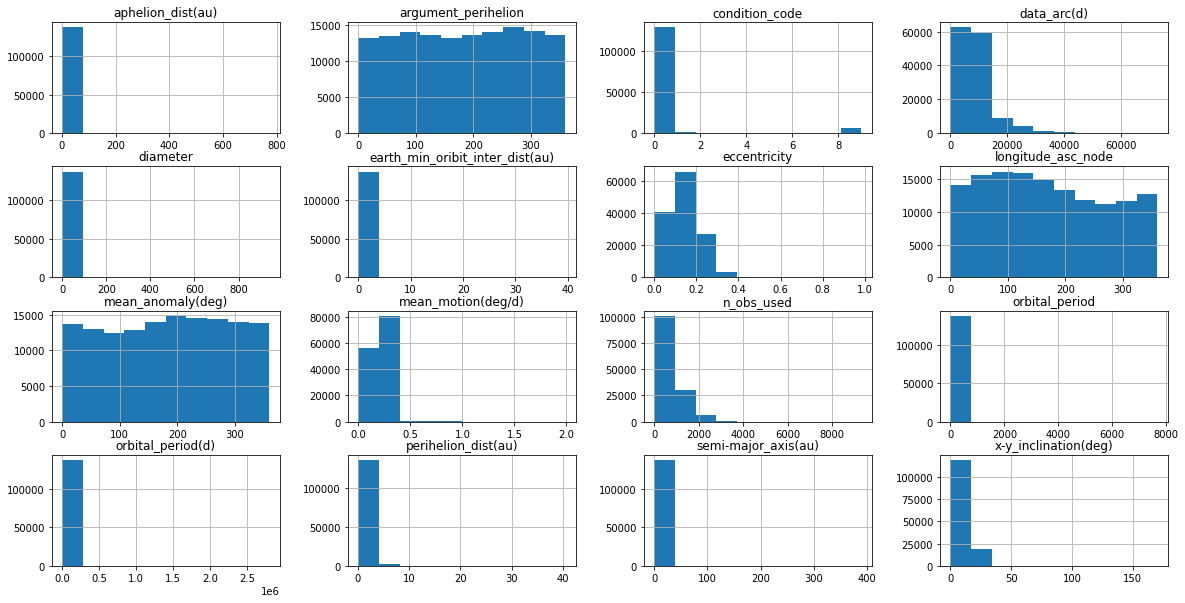

In [30]:
df.hist(figsize=(20,10));
plt.show;

Even though some of them look like there is no variation, many of them have a max that is signifcantly higher than the rest of the records. To get a better look at some of the variables, boxplots can be used.

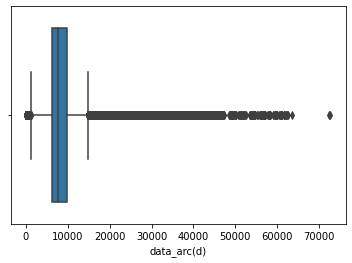

In [31]:
sns.boxplot(df['data_arc(d)'])

This helps to show how skewed data_arc is and that median is a better option for filling in the missing values, than mean.

In [32]:
df['data_arc(d)'] = df['data_arc(d)'].fillna(df['data_arc(d)'].median())

Do a final check to verify that the data is ready to work with.

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
semi-major_axis(au),137636.0,2.814613,1.522740,0.626226,2.536714,2.750859,3.092537,3.891460e+02
eccentricity,137636.0,0.145485,0.077573,0.000489,0.089623,0.138543,0.191141,9.843482e-01
x-y_inclination(deg),137636.0,10.349182,6.835111,0.021855,5.120506,9.389963,13.738588,1.703236e+02
longitude_asc_node,137636.0,169.827629,102.713052,0.000738,82.334880,160.438430,256.268387,3.599909e+02
argument_perihelion,137636.0,181.904551,103.556464,0.004466,91.947943,183.669900,271.762261,3.599952e+02
perihelion_dist(au),137636.0,2.402609,0.516169,0.081882,2.068948,2.363897,2.685811,4.046567e+01
aphelion_dist(au),137636.0,3.226618,2.896374,0.999956,2.864438,3.167516,3.468608,7.722011e+02
orbital_period,137636.0,4.884248,25.532565,0.495569,4.040317,4.562581,5.438518,7.676743e+03
data_arc(d),137636.0,8968.417086,6162.243453,1.000000,6292.000000,7572.000000,9726.000000,7.268400e+04
condition_code,137636.0,0.485207,1.966078,0.000000,0.000000,0.000000,0.000000,9.000000e+00


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 19 columns):
semi-major_axis(au)                137636 non-null float64
eccentricity                       137636 non-null float64
x-y_inclination(deg)               137636 non-null float64
longitude_asc_node                 137636 non-null float64
argument_perihelion                137636 non-null float64
perihelion_dist(au)                137636 non-null float64
aphelion_dist(au)                  137636 non-null float64
orbital_period                     137636 non-null float64
data_arc(d)                        137636 non-null float64
condition_code                     137636 non-null int64
n_obs_used                         137636 non-null int64
near_earth_obj                     137636 non-null object
physically_hazardous_asteroid      137636 non-null object
diameter                           137636 non-null float64
earth_min_oribit_inter_dist(au)    137636 non-null float64
class     

Save the current state of the data to be used in the next steps.

In [35]:
new_file = 'Asteroid_Clean.csv'
df.to_csv(new_file)